In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd 
import re 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [3]:
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:

data = pd.read_csv('flipkart_reviews_dataset[1].csv') 
data.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114


In [5]:
# unique ratings 
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

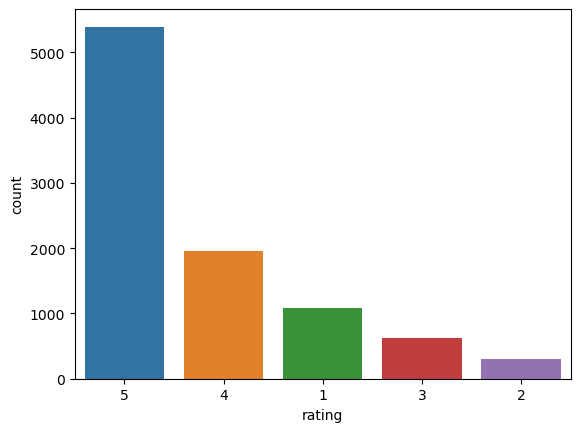

In [6]:

sns.countplot(data=data, 
              x='rating', 
              order=data.rating.value_counts().index)

In [7]:
# rating label(final) 
pos_neg = [] 
for i in range(len(data['rating'])): 
    if data['rating'][i] >= 5: 
        pos_neg.append(1) 
    else: 
        pos_neg.append(0) 
  
data['label'] = pos_neg 

In [8]:

from tqdm import tqdm 
  
  
def preprocess_text(text_data): 
    preprocessed_text = [] 
  
    for sentence in tqdm(text_data): 
        # Removing punctuations 
        sentence = re.sub(r'[^\w\s]', '', sentence) 
  
        # Converting lowercase and removing stopwords 
        preprocessed_text.append(' '.join(token.lower() 
                                          for token in nltk.word_tokenize(sentence) 
                                          if token.lower() not in stopwords.words('english'))) 
  
    return preprocessed_text 

In [9]:

preprocessed_review = preprocess_text(data['review'].values) 
data['review'] = preprocessed_review

100%|██████████| 9374/9374 [00:31<00:00, 299.11it/s]


In [10]:
data.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes,label
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1more flexible2bass high3sound clarity good 4b...,Shirala,8 months ago,1390,276,1
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,super sound good looking like prize,Visakhapatnam,8 months ago,643,133,1
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,much satisfied device price point awesome bran...,Kozhikode,"Feb, 2020",1449,328,1
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,nice headphone bass good sound clear purchase ...,Jaora,7 months ago,160,28,1
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,sound quality super battery backup super quali...,New Delhi,8 months ago,533,114,1


In [11]:

data["label"].value_counts()

label
1    5395
0    3979
Name: count, dtype: int64

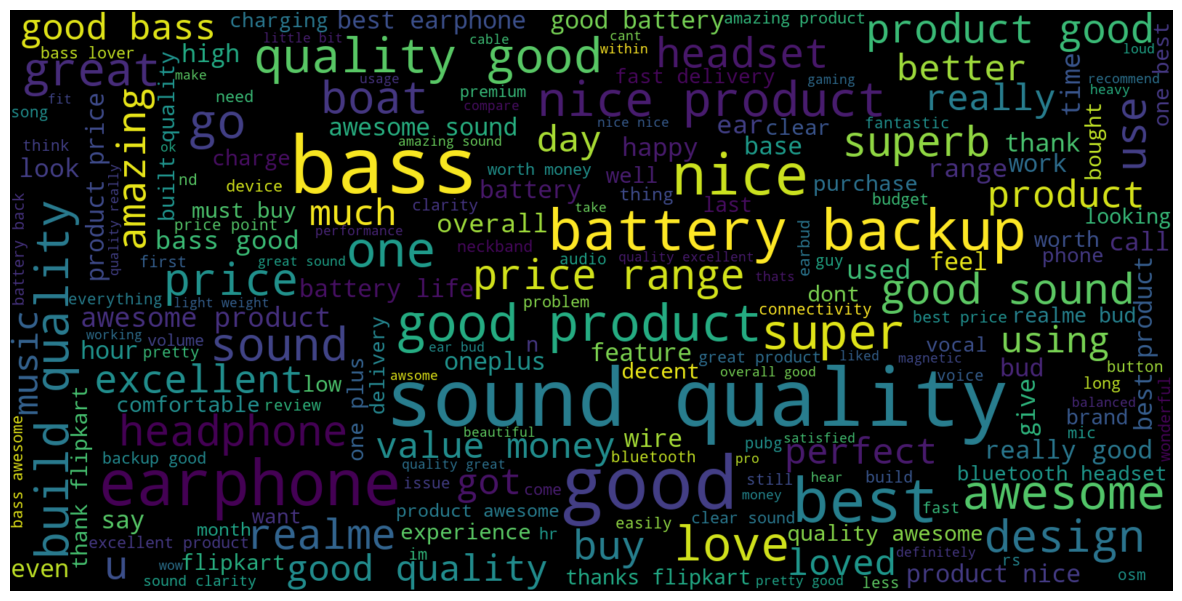

In [12]:

consolidated = ' '.join( 
    word for word in data['review'][data['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

In [13]:
cv = TfidfVectorizer(max_features=2500) 
X = cv.fit_transform(data['review'] ).toarray()

In [14]:
X

array([[0.        , 0.        , 0.15568143, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.24834054,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], 
                                                    test_size=0.33, 
                                                    stratify=data['label'], 
                                                    random_state = 42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  # Import accuracy_score

# Assuming X_train and y_train are already defined
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train, pred))

0.9514331210191083


0.9514331210191083


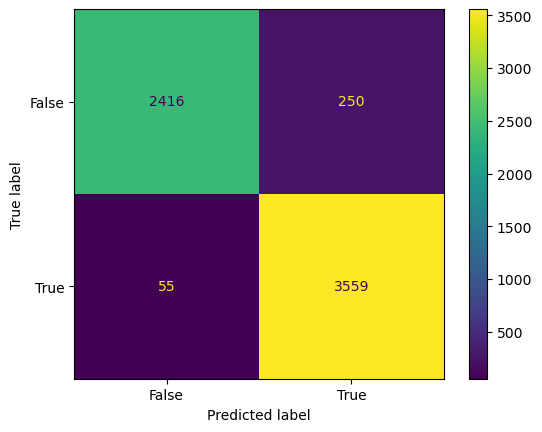

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay  # Import necessary functions
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train, pred))  # Use accuracy_score to calculate the accuracy

# Confusion matrix
cm = confusion_matrix(y_train, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()